In [1]:
from models import DSTP, SSP, DMC, StandardDDM, main
import multiprocessing.pool as mpp
import sys
import json
import pandas as pd
import numpy as np
import numba as nb

In [ ]:
ssp = SSP()
dmc = DMC()
dstp = DSTP()
main.validation([ssp, dmc, dstp])

in path instance
PARTICIPANT 1
run 1
group cdf quantiles:  [0.3529839315, 0.3765542165, 0.4235671805, 0.4588510745, 0.5764781880000001]
group caf cutoffs:  [0.37651215675, 0.417693284, 0.47060884975]
group cdf quantiles:  [0.352980178, 0.411804639, 0.447108749, 0.494136258, 0.588239363]
group caf cutoffs:  [0.38830002075, 0.44709642250000003, 0.5059033895]
differential_evolution step 1: f(x)= 902.9334802684186
alpha: 0.17378176326212774; beta: 0.335651058947398; p: 0.43481200976003687; sd_0: 1.8670044310991247; sd_r: 0.015857507771339287; tau: 0.3378751197509242; 
0.04078153823728659
differential_evolution step 2: f(x)= 902.9334802684186
alpha: 0.17378176326212774; beta: 0.335651058947398; p: 0.43481200976003687; sd_0: 1.8670044310991247; sd_r: 0.015857507771339287; tau: 0.3378751197509242; 
0.031295627568412185
differential_evolution step 3: f(x)= 827.0091519049666
alpha: 0.15857650580042304; beta: 0.3800606328802025; p: 0.41909306138635133; sd_0: 1.606235591099722; sd_r: 0.0191786790

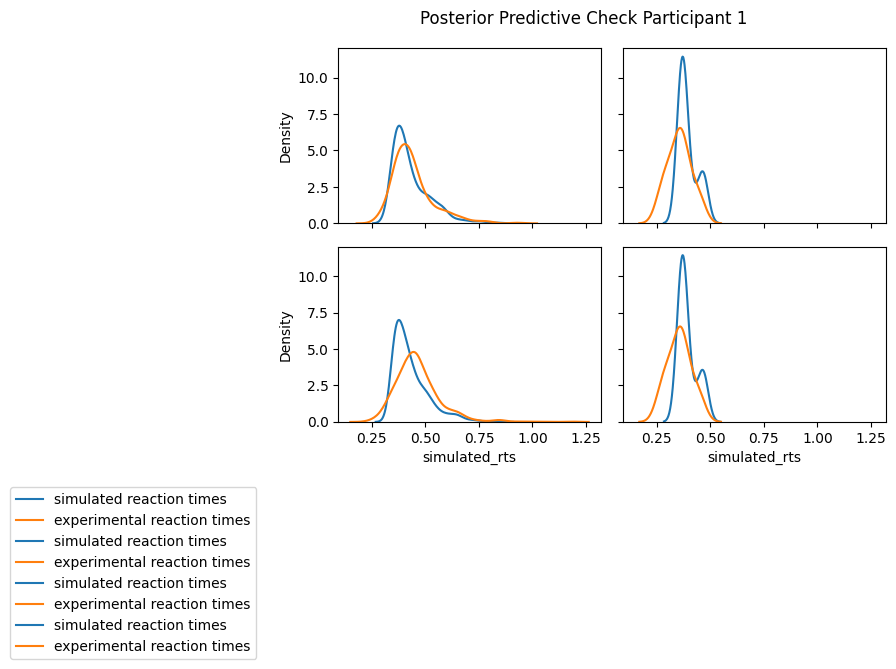

In [2]:
ssp = SSP()
main.fit([ssp], 1, 1, 'S1FlankerData.csv')

In [ ]:
#DSTP
dstp = DSTP()
main.fit([dstp], 1, 1, 'S1FlankerData.csv', return_dataframes=True)

In [ ]:
# posterior predictive checks
dstp = DSTP()
posteriorpredictivechecks.posterior_predictive([dstp], 1, 1, 'S1FlankerData.csv')

In [ ]:
ssp = SSP()
modelrecovery.param_recovery([ssp])

In [ ]:
ssp = SSP()
dmc = DMC()
dstp = DSTP()
modelrecovery.model_recovery([ssp, dmc, dstp])